In [10]:
!unzip chest_xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0455-0001.jpeg  
  inflating: chest_xray/train/NO

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
paths = []
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if it's an image file
            paths.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# CNN Model

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt

# Saperating Paths of Images

In [18]:
paths[:5]

['/content/chest_xray/train/PNEUMONIA/person470_bacteria_1996.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person331_bacteria_1526.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person75_bacteria_366.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person64_bacteria_310.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person942_virus_1611.jpeg']

In [19]:
print(paths[10])

/content/chest_xray/train/PNEUMONIA/person36_bacteria_184.jpeg


(648, 920, 3)


(<matplotlib.image.AxesImage at 0x78dab502d1d0>, None)

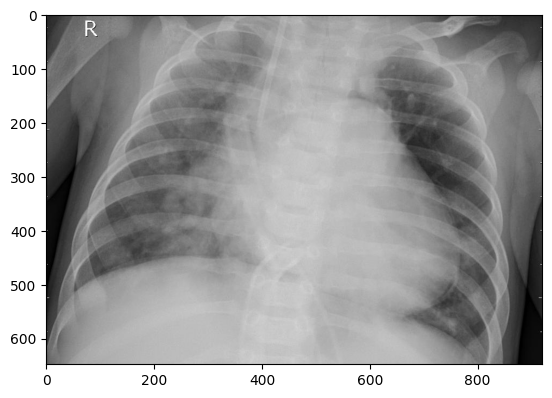

In [20]:
temp = cv.imread(paths[10])
plt.imshow(temp),print(temp.shape)

In [21]:
normal = []
pneumonia = []
for img in paths:
    if ".DS_Store" in img:
        pass
    elif "NORMAL" in img:
        normal.append(img)
    else:
        pneumonia.append(img)

In [22]:
print("normal",len(normal),"pneumonia",len(pneumonia)),print("Total",len(normal)+len(pneumonia))

normal 1583 pneumonia 4273
Total 5856


(None, None)

In [23]:
pneumonia[:10]

['/content/chest_xray/train/PNEUMONIA/person470_bacteria_1996.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person331_bacteria_1526.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person75_bacteria_366.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person64_bacteria_310.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person942_virus_1611.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person980_virus_1655.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1154_virus_1933.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person487_bacteria_2055.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person1601_bacteria_4212.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person696_bacteria_2594.jpeg']

In [24]:
bacteria = []
virus = []
for i in pneumonia:
    if "bacteria" in i:
        bacteria.append(i)
    else:
        virus.append(i)

In [25]:
len(normal),len(bacteria),len(virus),len(normal)+len(bacteria)+len(virus)

(1583, 2780, 1493, 5856)

# Getting Images

### Preprocessing image (gray,blur,resize etc.)

In [26]:
%time
def Preprocessor(data):
    temp = []
    for img in data:
        img = cv.imread(img)
        if type(img) == np.ndarray:
            img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
            img2 = cv.blur(img1,(3,3))
            temp.append(cv.resize(img2,(32,32)))
    return temp

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [27]:
%time
noraml_reshaped = Preprocessor(normal)
bacteria_reshaped = Preprocessor(bacteria)
virus_reshaped = Preprocessor(virus)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


Text(0.5, 1.0, 'virus')

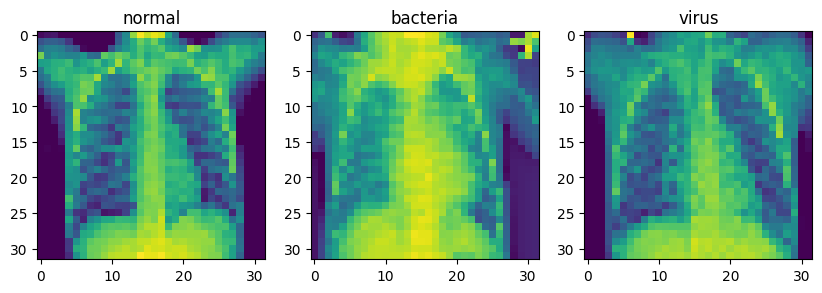

In [28]:
plt.figure(figsize=(10,9))
plt.subplot(1,3,1)
plt.imshow(noraml_reshaped[2])
plt.title("normal")
plt.subplot(1,3,2)
plt.imshow(bacteria_reshaped[2])
plt.title("bacteria")
plt.subplot(1,3,3)
plt.imshow(virus_reshaped[2])
plt.title("virus")

# Splitting data into training and testing equally 80 by 20 ratio

In [29]:
# training data
n_train = noraml_reshaped[:int((80/100)*len(noraml_reshaped))]
b_train = bacteria_reshaped[:int((80/100)*len(bacteria_reshaped))]
v_train = virus_reshaped[:int((80/100)*len(virus_reshaped))]
y_train = [1]*len(n_train) + [0]*len(b_train) + [2]*len(v_train)

# testing data
n_test = noraml_reshaped[int((80/100)*len(noraml_reshaped)):]
b_test = bacteria_reshaped[int((80/100)*len(bacteria_reshaped)):]
v_test = virus_reshaped[int((80/100)*len(virus_reshaped)):]
y_test = [1]*len(n_test) + [0]*len(b_test) + [2]*len(v_test)

# Normalization

In [30]:
# training data
normal_scaled = np.array(n_train)/255
bacteria_scaled = np.array(b_train)/255
virus_scaled = np.array(v_train)/255
# testing data
normal_scaled_t = np.array(n_test)/255
bacteria_scaled_t = np.array(b_test)/255
virus_scaled_t = np.array(v_test)/255

# Creating training and testing dataset

In [31]:
X_train = np.array(list(normal_scaled) + list(bacteria_scaled) + list(virus_scaled))
X_test = np.array(list(normal_scaled_t) + list(bacteria_scaled_t) + list(virus_scaled_t))
len(X_train),len(y_train),len(X_test),len(y_test)

(4684, 4684, 1172, 1172)

In [32]:
X_train_final = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test_final = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_train_final.shape,X_test_final.shape

((4684, 32, 32, 1), (1172, 32, 32, 1))

In [33]:
y_train_final = np.array(y_train)
y_test_final = np.array(y_test)
set(y_test_final),set(y_train_final)

({0, 1, 2}, {0, 1, 2})

# Building Model using CNN

In [34]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])
model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=['accuracy']
)
model.fit(X_train_final,y_train_final,epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6063 - loss: 0.8314
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.7744 - loss: 0.5191
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.7854 - loss: 0.4852
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8088 - loss: 0.4537
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.8011 - loss: 0.4380
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8128 - loss: 0.4267
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.8204 - loss: 0.3995
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.8264 - loss: 0.3950
Epoch 9/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.8326 - loss: 0.3725
Epoch 10/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.8542 - loss: 0.3277
Epoch 11/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8439 - loss: 0.3560
Epoch 12/20
147/147 ━━━━━━━━━

In [35]:
model.evaluate(X_test_final,y_test_final)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6337 - loss: 2.8650


[1.9656503200531006, 0.670648455619812]

In [36]:
model.save('pneumonia_classification.keras')

# Plotting heatmap

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
1172 1172


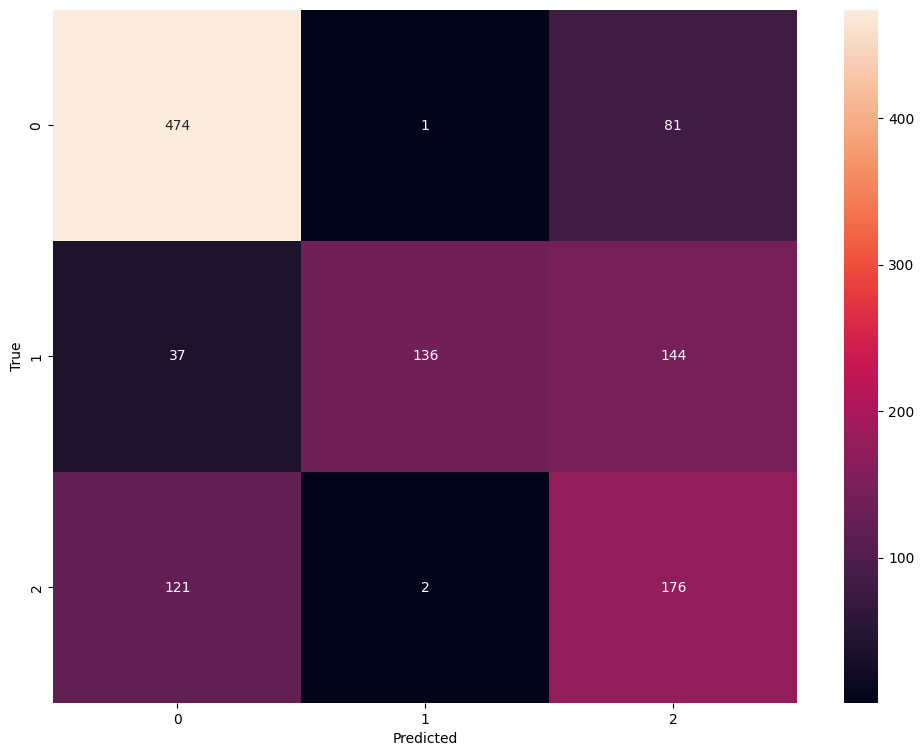

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(12,9))
y_predicted = model.predict(X_test_final)
y_predicted = [np.argmax(pred) for pred in y_predicted]
print(len(y_predicted),len(y_test_final))
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='')
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

# Machine learning model

## Convert 2 dim into 1 dim

In [38]:
normal_scaled.shape

(1266, 32, 32)

In [39]:
normal_scaled_1d = normal_scaled.reshape((normal_scaled.shape[0],32*32))
bacteria_scaled_1d = bacteria_scaled.reshape((bacteria_scaled.shape[0],32*32))
virus_scaled_1d = virus_scaled.reshape((virus_scaled.shape[0],32*32))

In [40]:
normal_scaled_1d.shape

(1266, 1024)

# Creating Dataframe

In [41]:
df1_temp = pd.DataFrame(normal_scaled_1d)
df2_temp = pd.DataFrame(bacteria_scaled_1d)
df3_temp = pd.DataFrame(virus_scaled_1d)

In [42]:
df1_l = np.c_[df1_temp,np.array(["N"]*len(df1_temp))]
df2_l = np.c_[df2_temp,np.array(["B"]*len(df2_temp))]
df3_l = np.c_[df3_temp,np.array(["V"]*len(df3_temp))]

In [43]:
df1_ = pd.DataFrame(df1_l)
df2_ = pd.DataFrame(df2_l)
df3_ = pd.DataFrame(df3_l)
df = pd.concat([df1_,df2_,df3_],axis=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.17254901960784313,0.1568627450980392,0.13725490196078433,0.0392156862745098,0.0,0.0,0.0,0.0,0.20392156862745098,0.6078431372549019,...,0.49019607843137253,0.4666666666666667,0.5019607843137255,0.7411764705882353,0.6549019607843137,0.6549019607843137,0.5803921568627451,0.15294117647058825,0.0,N
1,0.0,0.10196078431372549,0.34509803921568627,0.403921568627451,0.5411764705882353,0.5725490196078431,0.3843137254901961,0.3686274509803922,0.25098039215686274,0.027450980392156862,...,0.7294117647058823,0.6588235294117647,0.5215686274509804,0.03137254901960784,0.0,0.0,0.0,0.8431372549019608,1.0,N
2,0.027450980392156862,0.054901960784313725,0.058823529411764705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7843137254901961,0.7607843137254902,0.7568627450980392,0.6470588235294118,0.5411764705882353,0.30980392156862746,0.0,0.0,0.0,N
3,0.12941176470588237,0.27450980392156865,0.2784313725490196,0.25098039215686274,0.26666666666666666,0.23137254901960785,0.5176470588235295,0.45098039215686275,0.5215686274509804,0.5294117647058824,...,0.6627450980392157,0.611764705882353,0.6,0.5725490196078431,0.4745098039215686,0.3764705882352941,0.2627450980392157,0.00392156862745098,0.0,N
4,0.5568627450980392,0.6588235294117647,0.3568627450980392,0.4117647058823529,0.4666666666666667,0.4745098039215686,0.42745098039215684,0.30196078431372547,0.10588235294117647,0.0,...,0.7254901960784313,0.6941176470588235,0.6901960784313725,0.7137254901960784,0.6784313725490196,0.615686274509804,0.23529411764705882,0.0,0.0,N


In [44]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
1189,0.27450980392156865,0.38823529411764707,0.4666666666666667,0.3686274509803922,0.3843137254901961,0.36470588235294116,0.33725490196078434,0.3843137254901961,0.6274509803921569,0.8470588235294118,...,0.7725490196078432,0.7411764705882353,0.7254901960784313,0.6784313725490196,0.5490196078431373,0.6470588235294118,0.592156862745098,0.20784313725490197,0.0,V
1190,0.17647058823529413,0.2823529411764706,0.3176470588235294,0.40784313725490196,0.5411764705882353,0.36470588235294116,0.34509803921568627,0.36470588235294116,0.27058823529411763,0.2549019607843137,...,0.8,0.803921568627451,0.7490196078431373,0.6901960784313725,0.6980392156862745,0.5254901960784314,0.25882352941176473,0.023529411764705882,0.03137254901960784,V
1191,0.09411764705882353,0.08627450980392157,0.3333333333333333,0.08235294117647059,0.16470588235294117,0.15294117647058825,0.18823529411764706,0.2549019607843137,0.29411764705882354,0.30980392156862746,...,0.6235294117647059,0.5725490196078431,0.5450980392156862,0.41568627450980394,0.2901960784313726,0.03137254901960784,0.09019607843137255,0.10196078431372549,0.10588235294117647,V
1192,0.027450980392156862,0.22745098039215686,0.3607843137254902,0.5019607843137255,0.592156862745098,0.6392156862745098,0.6,0.5254901960784314,0.5843137254901961,0.6509803921568628,...,0.8235294117647058,0.8156862745098039,0.7725490196078432,0.7215686274509804,0.6588235294117647,0.615686274509804,0.2,0.0,0.0,V
1193,0.11764705882352941,0.7294117647058823,0.22745098039215686,0.21568627450980393,0.27058823529411763,0.22745098039215686,0.6078431372549019,0.15294117647058825,0.43529411764705883,0.21568627450980393,...,0.7254901960784313,0.7098039215686275,0.6705882352941176,0.6745098039215687,0.5333333333333333,0.0784313725490196,0.01568627450980392,0.03529411764705882,0.0392156862745098,V


# Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df[1024] = Encoder.fit_transform(df[1024])

In [46]:
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
52,0.0,0.058823529411764705,0.4588235294117647,0.4666666666666667,0.6039215686274509,0.7019607843137254,0.5882352941176471,0.5568627450980392,0.5843137254901961,0.5254901960784314,...,0.8980392156862745,0.8627450980392157,0.8352941176470589,0.7803921568627451,0.7843137254901961,0.7450980392156863,0.21176470588235294,0.9882352941176471,0.7411764705882353,2
383,0.043137254901960784,0.0,0.0,0.0,0.0,0.0,0.2235294117647059,0.27058823529411763,0.1803921568627451,0.2784313725490196,...,0.7647058823529411,0.7764705882352941,0.7725490196078432,0.7490196078431373,0.7568627450980392,0.7333333333333333,0.6705882352941176,0.3764705882352941,0.09019607843137255,2
125,0.1411764705882353,0.20784313725490197,0.2235294117647059,0.2196078431372549,0.22745098039215686,0.19607843137254902,0.21568627450980393,0.1803921568627451,0.25098039215686274,0.3215686274509804,...,0.45098039215686275,0.35294117647058826,0.2980392156862745,0.3333333333333333,0.2627450980392157,0.3686274509803922,0.27058823529411763,0.17254901960784313,0.0784313725490196,2


# Data Preprocessing

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4684 entries, 0 to 1193
Columns: 1025 entries, 0 to 1024
dtypes: int64(1), object(1024)
memory usage: 36.7+ MB


In [48]:
df.isnull().sum().max()

0

In [49]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
X_train,X_test,y_train,y_test = train_test_split(df.drop([1024],axis='columns'),df[1024])

In [51]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
model.save('pneumonia_classification.keras')

In [52]:
model_rf.score(X_test,y_test)

0.7899231426131511

# Conclusion
By understanding notebook and model performance, I can say that it worked with a better score.
However, due to memory constraints, fine tuning the model will result in a significant increase in model performance.<br>
I am not able to show you that.<br>
**Let's look again at whatever we saw up until:**<br>
* Image Collection <br>
* Image Processing<br>
* Normalization<br>
* Spliting data into training and testing with 80 by 20 ratio<br>
* Spliting data into X_trian,X_test,y_train,y_test<br>
* Built model
* Evaluation with heatmap<br>
* built model with machine learning and looked at difference between scores


In [59]:
# prompt: out put should be like yes there is an pneumonia 100% or no pneumonia 100%

import numpy as np
from tensorflow import keras
import cv2 as cv

# Load the trained model
model = keras.models.load_model('pneumonia_classification.keras')

def predict_pneumonia(image_path):
    img = cv.imread(image_path)
    if img is None:
        return "Error: Could not read image file."

    img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img2 = cv.blur(img1, (3, 3))
    img_resized = cv.resize(img2, (32, 32))
    img_scaled = np.array(img_resized) / 255
    img_final = img_scaled.reshape((1, 32, 32, 1))

    prediction = model.predict(img_final)
    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        return "yes there is an pneumonia 100%" # Assuming class 0 represents pneumonia
    elif predicted_class == 1:
      return "no pneumonia 100%" # Assuming class 1 represents no pneumonia
    else:
      return "no pneumonia 100%" #defaulting to "no pneumonia" for other classes


# Example usage
image_path = "/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg" # Replace with your image path
result = predict_pneumonia(image_path)
result


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


'no pneumonia 100%'